# **<center>$0 - Technical$ $Environment$💻</center>**

## **Import Packages & Modules**

In [ ]:
# !python --version

In [ ]:
# pip list

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%%bash 
pip install --quiet -U "graphviz" "pydot" "phik" "slicer" "imbalanced-learn" "scikit-learn" "more-itertools" "shap" "scipy" "plotly_express" "ipython-autotime" "pyyaml==5.4.1"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
%%bash 
pip install --quiet -U "descartes" "geopy"

In [ ]:
%load_ext autotime

time: 284 µs (started: 2022-01-31 15:51:34 +00:00)


In [ ]:
# General tools
import os
import re
import sys
if 'google.colab' in sys.modules: 
    from google.colab import files, drive, data_table
from datetime import datetime
from time import time
import random
from collections import OrderedDict, defaultdict
from functools import reduce
import itertools
import more_itertools
from more_itertools import all_equal
import tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
# from typeguard import typechecked
import warnings
warnings.filterwarnings("ignore")

# Main tools
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import scipy
import scipy.stats
from scipy.stats.stats import pearsonr
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_venn
import matplotlib.colors as mcolors
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import pydot
import graphviz
from IPython.display import Image
from ipywidgets import widgets
colors_1 = list(mcolors.CSS4_COLORS.keys())[10:]
colors_3 = sns.color_palette()
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
%matplotlib inline

# import sort_dataframeby_monthorweek as sd
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates
colors_2 = px.colors.qualitative.Prism
palette_list = ['pastel', 'Pastel1', 'Pastel2', 'husl',
                'coolwarm','rocket', 'rainbow_r', 'magma_r',
                'Set2', 'Set1_r', 'RdYlGn', 'vlag', 'cool']


In [ ]:
# For transformations
from sklearn.preprocessing import MinMaxScaler, normalize, Normalizer, StandardScaler,PowerTransformer,\
                                  MaxAbsScaler, maxabs_scale, quantile_transform, QuantileTransformer
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.feature_selection import SelectKBest, f_classif, chi2,\
                                        mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.utils.estimator_checks import check_estimator

# For modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
# For the tree visualization
from six import StringIO

# For scoring and curve fitting
import scipy
import scipy.stats
from scipy.optimize import curve_fit
from scipy.stats.stats import pearsonr
import phik
from phik.report import plot_correlation_matrix
from phik import report
import shap
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score, plot_precision_recall_curve
from sklearn.metrics import log_loss
from sklearn.metrics import pairwise_distances
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import loguniform

# For validation
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import KFold, StratifiedShuffleSplit, ShuffleSplit, GroupKFold, RandomizedSearchCV

# For ensembling
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier,\
                                GradientBoostingClassifier, RandomForestClassifier

# For pipline
from sklearn.pipeline import Pipeline, make_pipeline

# For clustering and noise
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import ADASYN
import scipy.cluster.hierarchy as sch

# For Deployment
import joblib

seedNum = 2021
np.random.seed(seedNum)
random.seed(seedNum)

pd.set_option('display.max_columns', 32)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 20)

print(f'sklearn: {sklearn.__version__} np: {np.__version__} pd: {pd.__version__} xgb: {xgb.__version__}')

sklearn: 1.0.2 np: 1.19.5 pd: 1.1.5 xgb: 0.90


In [ ]:
## set\reset the normal wiew options of the df
def normal_pd_view_settings(dataFrame, reset_all=False):
    if reset_all:
      return pd.reset_option("^display")
    else:
      pd.set_option("max_colwidth", 70)
      pd.set_option('display.max_rows', 20)
      pd.set_option('display.min_rows', 10)
      pd.set_option("max_column", dataFrame.shape[1])
      # pd.set_option("max_seq_items", 70)
      # pd.set_option("display.width", 10)
      return print('normal pd view settings in place')

## change the wiew options of the df for wide observation
def wide_pd_view_settings(dataFrame):
    pd.set_option("max_colwidth", 800)
    pd.set_option("max_row", 400)
    pd.set_option("min_row", 40)
    pd.set_option("max_column", dataFrame.shape[1])
    return print('wide pd view settings in place')

# **<center>$1 - The$ $Problem$ 🔍**

## **1.1 - Dataset - Backgroung and Motivation**

- Data was taken from $Kaggle$ - https://www.kaggle.com/jessemostipak/hotel-booking-demand


Main Goal: predict whether a booking will be canceled or not

#**<center>$2-The Data:EDA$📚🔍**

## **2.1  Features Initial Overview**

-Hotel - Hotel (H1 = Resort Hotel or H2 = City Hotel)

-Is_cancelled - Value indicating if the booking was canceled (1) or not (0)

-LeadTime - Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

-ArrivalDateYear- Year of arrival date

-ArrivalDateMonth - Month of arrival date

-ArrivalDateWeek - Week number of year for arrival date

-Arrival_date_day_of_month - Day of arrival date

-Stays_in_weekend_nights -Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

-Stays_in_week_nights - Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

-Adults -Number of adults

-Meal - Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal

-Country -Country of origin. Categories are represented in the ISO 3155–3:2013 format

-Market_segment - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators

-Distribution_channel - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

-Is_repeated_guest - Value indicating if the booking name was from a repeated guest (1) or not (0)

-Previous_cancellations - Number of previous bookings that were cancelled by the customer prior to the current booking

-Previous_bookings_not_canceled - Number of previous bookings not cancelled by the customer prior to the current booking

-Reserved_room_type -Code of room type reserved. Code is presented instead of designation for anonymity reasons.

-Assigned_room_type - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due

-Booking_changes - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS

-Company - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for

-Agent- ID of the agent thar made the reservation

-Days_in_waiting_list - Number of days the booking was in the waiting list before it was confirmed to the customer

-Customer_type -Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it;

## **2.2 - Data Loading**


In [ ]:
!pwd 
drive.mount('/content/drive/') # Mounting the personal drive - for data access

/content
Mounted at /content/drive/


In [ ]:
os.listdir('/content/')

['.config', 'drive', 'sample_data']

In [ ]:
# upload data via kaggle API
!pip install kaggle

!mkdir ~/.kaggle

!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

!kaggle datasets download jessemostipak/hotel-booking-demand

!unzip hotel-booking-demand.zip

  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 86.5MB/s]
Archive:  hotel-booking-demand.zip
  inflating: hotel_bookings.csv      


In [ ]:
!ls ~/.kaggle

kaggle.json


In [ ]:
os.listdir('/content/')

['.config',
 'hotel-booking-demand.zip',
 'drive',
 'hotel_bookings.csv',
 'sample_data']

In [ ]:
data = pd.read_csv('/content/hotel_bookings.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data["is_canceled"].value_counts(normalize=True)

## **2.4 - Data overview and init cleaning**

In [ ]:
# General overview func'
def data_viewer_spars(data, heaD=2, samplE=False, fraC=0.2, rowS=10, minWidth=None): 
    cp_data = data.copy()
    pd.set_option('min_rows', rowS)
    try:
        pd.set_option("max_column", cp_data.shape[1])
    except:
        pd.reset_option("^display")
    if samplE:
        cp_data = display(cp_data.sample(frac=fraC).head(heaD))
    print("<<-----curr. shape----->>")
    # Print the number of rows and the columns in the data
    print(f'\ndata df with {cp_data.shape[0]} rows and {cp_data.shape[1]} columns')
    # sample of the DF
    display(data_table.DataTable(cp_data, include_index=True, num_rows_per_page=heaD, 
                                max_rows=None, max_columns=cp_data.shape[1], min_width=minWidth))
    print(50*"~","\n")
    print("<<-----info----->>")
    print(cp_data.info()) # overview
    print(50*"~","\n")
    print("<<-----describe----->>")
    # per fiture overview
    display(cp_data[cp_data.select_dtypes(exclude='object').columns].describe().T.\
            style.background_gradient(axis=0,cmap=sns.light_palette('blue', as_cmap=True)))
    print(50*"~","\n")
    print("<<-----NA----->>")
    if cp_data.isnull().values.sum() == 0:
        print("no null values in the data")
    else:
        for col in cp_data.columns.to_list():
            # Calculate the NA values per col sum 
            is_null_values = cp_data[col].isnull().sum()
            # If the NA values sum-up to be > 0, print the column, number of NA values & NA values percentage
            if is_null_values > 0:
                perc_is_null_vals = float(is_null_values)*100/cp_data.shape[0]
                print(f"feature: {col}")
                print(f"null values: {is_null_values}")
                print(f"null value %: {perc_is_null_vals:.3f}%\n")
    print(50*"~","\n")
    print("<<-----duplicated----->>")
    print(f"{cp_data.duplicated().sum()} dup values in the data")
    print(50*"~","\n")
    print("<<-----nunique----->>")
    for i in cp_data.columns.to_list():
        print(f'\n{i}:{cp_data[i].nunique()}')
    print(50*"~","\n")

def remove_faulty_data(data, faulty_data=[{'label': 'HouseAge', 'min': 0, 'max': 51}, {'label':'MedHouseVal', 'min': 0, 'max': 5}]):
# Faulty Data Removal
    org_size = len(data)
    for faulty_dict in faulty_data:
        before_size = len(data)
        data = data[(data[faulty_dict['label']]>faulty_dict['min'])&(data[faulty_dict['label']]<=faulty_dict['max'])]
        removal_size = before_size - len(data)
        print(f"For {faulty_dict['label']}: Removal of {removal_size} ({(removal_size/org_size)*100:.3f}% of the total data)")
    return data


# Visualization

# hist
# Function x**(1/2)
def forward(x):
    return x**(1/2)

def inverse(x):
    return x**2

def histploter(data, cols=[]):
    m, n = len(cols)*2, len(cols)
    k=int(round(data.shape[0]**0.5))
    j=int(round(30/m))
    fig=plt.figure(figsize=(20,15))
    for i, col in enumerate(cols, 1):
        ax1=fig.add_subplot(6,2,i)
        data[col].hist(bins=k,ax=ax1,facecolor=colors_1[i])
        ax1.set_title(f"{col} histogram (count^1/2 scaled)",color=colors_1[i], fontweight="bold", fontdict={'fontsize': m+j})
        ax1.set_yscale('logit')
        # ax1.set_yscale('function', functions=(forward, inverse))
        # ax2=fig.add_subplot(???)
        # sns.distplot(data[col], ax=ax2)
        # ax2.set_title(f"{col} distplot",color=colors_1[i], fontweight="bold", fontdict={'fontsize': 20})
    fig.tight_layout()
    plt.show()

# Features histplots (per col=columns)
def histploter_spars(data, cols):
    n, m = 13, 4
    stAt=input(f"select one of: 'count','density','probability','frequency'")
    plt.figure(figsize=(25,50))
    col_names_df = data[cols]
    for i, col in enumerate(col_names_df, 1):
        plt.subplot(n, m, i)
        try:
            sns.histplot(data[col], kde=True, color=colors_1[i], stat=stAt);
        except:
            sns.histplot(data[col], color=colors_1[i], stat=stAt);
        plt.xlabel(col, fontsize=15, color='#CC481D');
        plt.title(f'Feature: {col}', fontsize=15);
    plt.tight_layout();
    plt.show();


def single_barploter(df, x, y ,style='seaborn-white', fontSize=12):
    plt.style.use(style)
    plt.figure(figsize=(15,6))
    df.plot.bar(x=x, y=y, rot=90, fontsize=fontSize,
                cmap="rainbow_r", figsize=(15,6));
    plt.ylabel(y, fontsize=fontSize);
    plt.xlabel(x, fontsize=fontSize);
    plt.title(f"{y} as {x} bar plot");
    plt.tick_params(labelsize=fontSize);
    plt.legend(fontsize=fontSize);
    plt.tight_layout();
    plt.show();

def histploter_spars(data, cols):
    # features histplots 
    n, m = 13, 4
    plt.figure(figsize=(25,50))
    col_names_df = data[cols]
    for i, col in enumerate(col_names_df, 1):
        plt.subplot(n, m, i)
        sns.histplot(data[col], kde=True, color=colors_1[i]);
        plt.xlabel(col, fontsize=15, color='#CC481D');
        plt.title(f'Feature: {col}', fontsize=15);
    plt.tight_layout();
    plt.show();

# Features boxplots (per col=columns)
def violinploter_spars(data, cols):
    n, m = 13, 4
    plt.figure(figsize=(25,50))
    col_names_df = data[cols]
    for i, col in enumerate(col_names_df, 1):
        plt.subplot(n, m, i)
        sns.violinplot(data[col], color=colors_1[i]);
        plt.xlabel(col, fontsize=15, color='#CC481D');
        plt.title(f'Feature: {col}', fontsize=15);
    plt.tight_layout();
    plt.show();
  
# crosstab
def cross_tabulizer(data, col):
    print(f"<---ct of {col}: totals+norm--->\n")
    plt.figure(figsize=(18,8))
    plt.subplot(221)
    ct1 = pd.crosstab(columns=data.is_canceled,index=data[col])
    sns.heatmap(ct1, annot=True, fmt='.6g',cmap="coolwarm")
    plt.subplot(222)
    ct2 = pd.crosstab(columns=data.is_canceled,index=data[col],
                normalize='index')
    sns.heatmap(ct2, annot=True, fmt='.6g',cmap="coolwarm")
    plt.show()


# countplot
# count and barplot ploting and ct for clean model

#### look at 2 features at a time!!! ######
def col_countNbarploter_2(data,col,cols=[]):
    if len(cols) > 2:
        print("TOO MANY COLUMNS!")
        return ('re-enter col\'s')
    print(f"<---ct of {col}: totals+norm--->\n")
    plt.figure(figsize=(15,6))
    plt.subplot(221)
    ct1 = pd.crosstab(columns=data.is_canceled,index=data[col])
    sns.heatmap(ct1, annot=True, fmt='.6g',cmap="coolwarm")
    plt.subplot(222)
    ct2 = pd.crosstab(columns=data.is_canceled,index=data[col],
                normalize='index')
    sns.heatmap(ct2, annot=True, fmt='.6g',cmap="coolwarm")
    plt.show()
    # display(pd.concat([ct1, ct1_norm], axis=1))
    print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    # countplots: cat features classes in light of cancelations
    print(f"<<--data cols to counretplot:{cols}-->>")
    sns.set(style="darkgrid")
    m, n = 6, 2
    plt.figure(figsize=(16,18))
    for i, col in enumerate(cols, 1):
        plt.subplot(m, n, i) # this line adds sub-axes
        ax = sns.countplot(x=col, hue="is_canceled", data=data, palette='vlag')
        # sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')
        # for c in ax.containers:
        #     # set the bar label
        #     ax.bar_label(c, label_type='center')
        plt.title(f"Canceled or not countplot: {col}",
                  fontweight="bold", fontdict={'fontsize': 20})

        plt.subplot(m, n, i+2) # this line adds sub-axes2
        ax2 = sns.barplot(x=col, y='is_canceled', data =data)
        # sns.move_legend(ax2, bbox_to_anchor=(1, 1.02), loc='upper left')
        # for c in ax2.containers:
        #     # set the bar label
        #     ax2.bar_label(c, label_type='center')
        plt.title(f"Canceled or not barplot: {col}",
                  fontweight="bold", fontdict={'fontsize': 20})
        

    plt.grid(True)
    plt.tight_layout()
    plt.show()

# # multy-pivot table ploting
def multy_pivot_col(data, col):
    print(f"<---pivot of {col}: totals--->\n")
    display(pd.pivot_table(data, values='assigned_room_type',
                        columns=col,
                        index=['hotel', 'is_canceled'],
                        aggfunc='count', fill_value=0)) # value is opptional for agg with numerical meaning on the values
    print(f"-----------------\n")
    print(f"<---hist of {col}: is\not cenceled--->\n")
    data[col].hist(by=data.is_canceled)
    print(f"-----------------\n")
    pd.pivot_table(data, values='assigned_room_type',
                columns=col,
                index=['hotel', 'is_canceled'],
                aggfunc='count', fill_value=0).plot.bar(figsize=(12,6))
    plt.title(f'is_canceled vs. {col} (per hotel)', fontweight="bold", fontdict={'fontsize': 20})
    plt.xlabel(f'{col}')
    plt.ylabel('Relative frequency')
    print(f"<---plot table: {col} (totals)--->\n")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# transformers

# lablizer for corr.
def label_encod_for_corr(data):
    data_copy = data.copy()
    data_cols_obj = [col for col in data_copy.select_dtypes(include='object').columns if col != 'reservation_status_date']
    # data_cols_obj.append('agent')
    for col in data_copy.select_dtypes(include='object').columns:
        data_copy[col] = data_copy[col].fillna('not_relevant')
        if not data_copy[col].isna().sum() == 0:
            print('oops! null detected!')
    for col in data_copy.select_dtypes(exclude='object').columns:
        data_copy[col] = data_copy[col].fillna(0)
        if not data_copy[col].isna().sum() == 0:
            print('oops! null detected!')
    print(data_cols_obj)
    for col in data_cols_obj:
        le = LabelEncoder()
        print(col)
        data_copy[col] = le.fit_transform(data_copy[col].astype(str))
    return data_copy

# Features PhiK correlation test (per col=columns non-linear corr.)
def phik_plotter(data, cols, inverval_cols=None, size=(9, 6), fontSize=1.2): # inreval columns best be pointed out
    inter_cols = [col for col in cols if col in data.columns.to_list()]
    phik_overview = data[inter_cols].phik_matrix(interval_cols=inter_cols)
    plot_correlation_matrix(phik_overview.round(2).values, 
                            x_labels=phik_overview.columns, 
                            y_labels=phik_overview.index, 
                            vmin=0, vmax=1, color_map="RdYlGn", 
                            title=r"correlation $\phi_K$", 
                            fontsize_factor=fontSize, 
                            figsize=size)
    significance_overview = data[inter_cols].significance_matrix(interval_cols=inter_cols)
    plot_correlation_matrix(significance_overview.fillna(0).round(2).values, 
                            x_labels=significance_overview.columns, 
                            y_labels=significance_overview.index, 
                            vmin=-5, vmax=5, title="Significance of the coefficients", 
                            usetex=False, fontsize_factor=fontSize, figsize=size)
    plt.tight_layout()

# **MOVE straight to part 3**

The repository is built from three components:
1. Two Colabs notebooks: EDA and Processing
2. Dataset file
3. Presentation

The proposed workflow:
1. Review project presentation.
2. Read EDA Colabs. In the workbook, we analyzed each feature and considered whether it correlates to the target, its correlation to other features, and how it will be engineered, if at all.
3. Proceed to the Process notebook. In the second notebook, we engineered the features, built, a transformer, and pipeline to deploy all relevant models (from Decision Tree to XGBoost).
   3.1 Features Engineer - Transformer- To understand the features in the transformer, please follow the relevant section of each feature in the EDA and the designated treatment:
             3.2  Hotel client profile - Customer Type
             3.3 Country Origin -Drop
             3.4  Marketing Efforts - Customer Type and Market Segment  -Ohn          
             3.6  Distribution Channel - Drop
             3.7  Price - 
            3.8  Deposit -Fix and Drop 
            3.9  Lead-Time - No change
             3.10 Time feature - Arrival Day/ month/year - Ohn
             3.11 Meals - Ohe
             3.12 Special requests - Ohn    
             3.13 Car Parking Space - Fix and Drop 
             3.14 Days in waiting list - 
             3.15 Booking Changes -
             3.16 Agent - Drop
             3.17 Company - Drop
             3.18 Is_repeated_guest
             3.19  Previous Bookings not Cancelled Previous_cancellations - Fix and Drop
             3.20  Reserved Room Type and Assigned Room Type -Ohn
             3.21  Reservation Status and Reservation Status Date- Drop
             3.22 Adults, children, babies - Fix

## `POC` for regrouping of the 3 family types features to one thr. Clustering

Lets try normalize > take a fraq=0.5 of the normed data > fit that part with AggClust, then predict on the train (?)

In [ ]:
data_temp = data.copy()
data_temp["children"] = data_temp["children"].fillna(0).astype(int)
data_temp_1 = data_temp.copy()
data_temp_2 = data_temp.copy()
data_temp_3 = data_temp.copy()

In [ ]:
data_temp.groupby(["adults","children","babies"]).size().to_frame()

0
adults children babies       
0      0        0         180
       1        0           4
       2        0         205
                1           3
       3        0          11
1      0        0       22577
                1           9
                9           1
       1        0         277
                1           2
       2        0         155
                1           2
       3        0           4
2      0        0       81560
                1         708
                2          12
                10          1
       1        0        3950
                1         136
                2           3
       2        0        3221
                1          27
       3        0          61
       10       0           1
3      0        0        5666
                1          10
       1        0         485
                1           2
       2        0          39
4      0        0          59
                1           1
       1        0           2
5      0        0           2
6      0        0           1
10     0        0           1
20     0        0           2
26     0        0           5
27     0        0           2
40     0        0           1
50     0        0           1
55     0        0           1

In [ ]:
data_temp[(data_temp['children']+data_temp['babies'])>8]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
328,Resort Hotel,1,55,2015,July,29,12,4,10,2,10,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,2,No Deposit,8.0,NaN,0,Contract,133.16,0,1,No-Show,2015-07-12
46619,City Hotel,0,37,2016,January,3,12,0,2,2,0,10,BB,PRT,Online TA,TA/TO,0,0,0,D,D,1,No Deposit,9.0,NaN,0,Transient,84.45,0,1,Check-Out,2016-01-14
78656,City Hotel,0,11,2015,October,42,11,2,1,1,0,9,BB,GBR,Corporate,Corporate,0,0,0,A,B,1,No Deposit,95.0,NaN,0,Transient-Party,95.00,0,0,Check-Out,2015-10-14


In [ ]:
def family_type_grouper_tst(data):
    if (data['adults'] >= 11): # big groups (no kids)
        val = 'adults_only_large'
    elif (data['adults'] < 11) & (data['adults'] > 2) & ((data['children'] + data['babies'])==0): # small groups (no kids)
        val = 'adults_only_small'
    elif (data['adults'] == 2) & ((data['children'] + data['babies'])==0): # couples
        val = 'adults_only_couples'
    elif (data['adults'] == 1) & ((data['children'] + data['babies'])==0): # single person
        val = 'adults_only_singles'
    elif (data['adults'] != 0) & (data['children']!=0) & (data['babies']==0): # family no babies
        val = 'family_wo_babies'
    elif (data['adults'] != 0) & ((data['children'] + data['babies'])!=0): # family with babies
        val = 'families_w_kids'
    elif (data['adults'] == 0) & ((data['children'] > 0) | (data['babies'] > 0)): # outliers (per kids no adults) 
        val = 'kids_no_adults'
    elif (data['adults'] == 0) & (data['children'] == 0) & (data['babies'] == 0): # outliers (per no people) 
        val = 'no_people'
    else:
        val = 'others'
    return val

In [ ]:
data_temp_2["family_type"] = data_temp_2.apply(family_type_grouper_tst, axis=1)
data_temp_2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,adults_only_couples
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,adults_only_couples
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,adults_only_singles
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,adults_only_singles
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,adults_only_couples


In [ ]:
data_temp_2['adults'] = MinMaxScaler().fit_transform(data_temp_2[['adults']])
data_temp_2['children'] = MinMaxScaler().fit_transform(data_temp_2[['children']])
data_temp_2['babies'] = MinMaxScaler().fit_transform(data_temp_2[['babies']])
data_temp_2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,family_type
0,Resort Hotel,0,342,2015,July,27,1,0,0,0.036364,0.0,0.0,BB,PRT,Direct,Direct,...,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,adults_only_couples
1,Resort Hotel,0,737,2015,July,27,1,0,0,0.036364,0.0,0.0,BB,PRT,Direct,Direct,...,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,adults_only_couples
2,Resort Hotel,0,7,2015,July,27,1,0,1,0.018182,0.0,0.0,BB,GBR,Direct,Direct,...,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,adults_only_singles
3,Resort Hotel,0,13,2015,July,27,1,0,1,0.018182,0.0,0.0,BB,GBR,Corporate,Corporate,...,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,adults_only_singles
4,Resort Hotel,0,14,2015,July,27,1,0,2,0.036364,0.0,0.0,BB,GBR,Online TA,TA/TO,...,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,adults_only_couples


In [ ]:
data_temptemp_2 = data_temp_2[['adults', 'children','babies']].apply(lambda s: round(s, 3), axis=1).replace(0,0.0001)
data_temptemp_2 = data_temptemp_2.fillna(0.0001)
data_temp_2 = data_temptemp_2.join(data_temp_2.family_type)
data_temp_2.head()

,adults,children,babies,family_type
0,0.036,0.0001,0.0001,adults_only_couples
1,0.036,0.0001,0.0001,adults_only_couples
2,0.018,0.0001,0.0001,adults_only_singles
3,0.018,0.0001,0.0001,adults_only_singles
4,0.036,0.0001,0.0001,adults_only_couples


In [ ]:
# Shuffle DF 
shuffled_dt2 = data_temp_2.sample(frac=0.5, random_state=seedNum)

# Define a size for your train set 
tr_shuf_dt2_size = int(0.7 * len(shuffled_dt2))

# Split your dataset 
train_shuf_dt2 = shuffled_dt2[:tr_shuf_dt2_size]
test_shuf_dt2 = shuffled_dt2[tr_shuf_dt2_size:]

In [ ]:
train_shuf_dt2_slice = train_shuf_dt2[['adults', 'children','babies']]
train_shuf_dt2_slice

,adults,children,babies
50840,0.036,0.0001,0.0001
44106,0.036,0.0001,0.0001
107102,0.036,0.0001,0.0001
31113,0.018,0.0001,0.0001
98401,0.036,0.0001,0.0001
70035,0.018,0.0001,0.0001
115635,0.036,0.2000,0.0001
48163,0.018,0.0001,0.0001
50852,0.018,0.0001,0.0001
32633,0.018,0.0001,0.0001


In [ ]:
lnkg_df = sch.linkage(train_shuf_dt2_slice, method='ward', metric='euclidean')
lnkg_df

array([[    0.   ,     1.   ,     0.   ,     2.   ],
       [    2.   , 41786.   ,     0.   ,     3.   ],
       [    4.   , 41787.   ,     0.   ,     4.   ],
       ...,
       [83558.   , 83567.   ,     2.353, 38768.   ],
       [83563.   , 83564.   ,     3.95 ,  3018.   ],
       [83568.   , 83569.   ,    10.822, 41786.   ]])

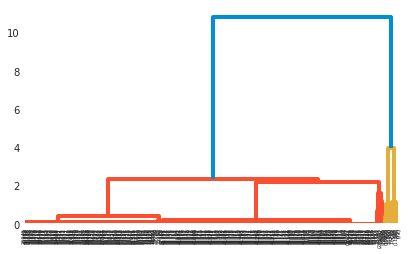

<Figure size 2160x720 with 0 Axes>

In [ ]:
dendrogram = sch.dendrogram(lnkg_df, color_threshold=8, truncate_mode='lastp', p=400)
plt.figure(figsize=(30, 10));
dendrogram;

In [ ]:
agglClst = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
agglClst.fit(train_shuf_dt2_slice)
agglClst_labels = agglClst.labels_

In [ ]:
len(set(agglClst_labels))

8

In [ ]:
print(f"Silhoette Coefficient: {metrics.silhouette_score(train_shuf_dt2_slice, agglClst_labels):0.3f}")

Silhoette Coefficient: 0.989


In [ ]:
# Silhoette Coefficient: 0.992 # for n_clusters=10
# Silhoette Coefficient: 0.990 # for n_clusters=8

In [ ]:
train_shuf_dt2_slice['family_cluster'] = agglClst.fit_predict(train_shuf_dt2_slice)
train_shuf_dt2_slice

,adults,children,babies,family_cluster
50840,0.036,0.0001,0.0001,6
44106,0.036,0.0001,0.0001,6
107102,0.036,0.0001,0.0001,6
31113,0.018,0.0001,0.0001,4
98401,0.036,0.0001,0.0001,6
70035,0.018,0.0001,0.0001,4
115635,0.036,0.2000,0.0001,2
48163,0.018,0.0001,0.0001,4
50852,0.018,0.0001,0.0001,4
32633,0.018,0.0001,0.0001,4


In [ ]:
train_shuf_dt2 = train_shuf_dt2_slice.join(train_shuf_dt2.family_type)
train_shuf_dt2.head()

,adults,children,babies,family_cluster,family_type
50840,0.036,0.0001,0.0001,6,adults_only_couples
44106,0.036,0.0001,0.0001,6,adults_only_couples
107102,0.036,0.0001,0.0001,6,adults_only_couples
31113,0.018,0.0001,0.0001,4,adults_only_singles
98401,0.036,0.0001,0.0001,6,adults_only_couples


In [ ]:
train_shuf_dt2.groupby(['family_cluster'])['family_type'].size().to_frame()

,family_type
family_cluster,
0,1720
1,265
2,1297
3,1990
4,7878
5,4
6,28631
7,1


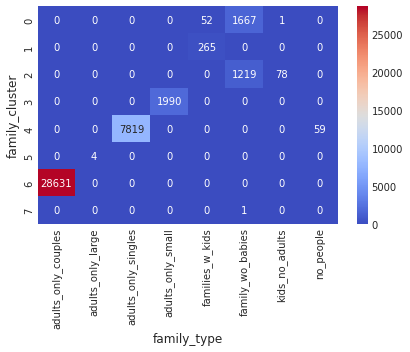

In [ ]:
ct1 = pd.crosstab(columns=train_shuf_dt2["family_type"],index=train_shuf_dt2["family_cluster"])
sns.heatmap(ct1, annot=True, fmt='.6g',cmap="coolwarm", cbar=False)

In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==7)&(train_shuf_dt2['family_type']=='family_wo_babies')].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type
328,2,10,0,family_wo_babies


the `0` and `1` cluster diff for `family_w_babies` is nor real.. as can be seen:



In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==0)&(train_shuf_dt2['family_type']=='family_w_babies')].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type
27258,2,1,1,family_w_babies
96004,2,2,1,family_w_babies
79650,2,1,1,family_w_babies
94599,2,1,1,family_w_babies
25035,2,1,1,family_w_babies
81482,2,2,1,family_w_babies
35008,2,1,1,family_w_babies
42564,2,1,1,family_w_babies
115705,2,1,1,family_w_babies
119106,2,1,1,family_w_babies


In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==0)&(train_shuf_dt2['family_type']=='family_w_babies')].index][['adults', 'children','babies','is_canceled']].join(train_shuf_dt2["family_type"])['is_canceled'].value_counts(normalize=True)

0    0.865385
1    0.134615
Name: is_canceled, dtype: float64

In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==1)&(train_shuf_dt2['family_type']=='family_w_babies')].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type
84591,2,1,2,family_w_babies
107837,2,1,2,family_w_babies


In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==1)&(train_shuf_dt2['family_type']=='family_w_babies')].index][['adults', 'children','babies','is_canceled']].join(train_shuf_dt2["family_type"])['is_canceled'].value_counts(normalize=True)

0    1.0
Name: is_canceled, dtype: float64

keep `'adults_only_large'`?

In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==8)&(train_shuf_dt2['family_type']=='adults_only_large')].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type


In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==2)].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type
115635,2,2,0,family_wo_babies
38698,2,2,0,family_wo_babies
111665,1,2,0,family_wo_babies
51764,2,2,0,family_wo_babies
77618,1,2,0,family_wo_babies
25824,2,3,0,family_wo_babies
16641,2,2,0,family_wo_babies
73159,2,2,0,family_wo_babies
7100,2,2,0,family_wo_babies
6030,2,2,0,family_wo_babies


for 10 clusters (large adult group starts at 6): 2 bottom code-line is: A > 2 kids no baby, B > 1 kid no baby. looks like B can also have more then 2 adults

In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==0)&(train_shuf_dt2['family_type']=='family_wo_babies')].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type
115635,2,2,0,family_wo_babies
38698,2,2,0,family_wo_babies
111665,1,2,0,family_wo_babies
51764,2,2,0,family_wo_babies
77618,1,2,0,family_wo_babies
25824,2,3,0,family_wo_babies
16641,2,2,0,family_wo_babies
73159,2,2,0,family_wo_babies
7100,2,2,0,family_wo_babies
6030,2,2,0,family_wo_babies


In [ ]:
data_temp.iloc[train_shuf_dt2[(train_shuf_dt2['family_cluster']==3)&(train_shuf_dt2['family_type']=='family_wo_babies')].index][['adults', 'children','babies']].join(train_shuf_dt2["family_type"])

,adults,children,babies,family_type
69220,2,1,0,family_wo_babies
56139,2,1,0,family_wo_babies
96613,2,1,0,family_wo_babies
13712,2,1,0,family_wo_babies
109590,2,1,0,family_wo_babies
94543,2,1,0,family_wo_babies
106253,2,1,0,family_wo_babies
96408,2,1,0,family_wo_babies
99343,2,1,0,family_wo_babies
94060,2,1,0,family_wo_babies


## POC `previous_cancellations`\`previous_bookings_not_canceled` eng.

In [ ]:
data_temp_3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data_temp_3[(data_temp_3['previous_bookings_not_canceled']>0)&(data_temp_3['previous_cancellations']>0)]

In [ ]:
data_temp_3[(data_temp_3['previous_bookings_not_canceled']>0)&(data_temp_3['previous_cancellations']>0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13805,Resort Hotel,1,2,2016,October,42,12,0,2,1,0,0,BB,NaN,Corporate,Corporate,0,1,3,A,A,0,No Deposit,NaN,94.0,0,Transient,37.0,0,0,Canceled,2016-10-10
13811,Resort Hotel,1,71,2016,July,29,14,3,8,2,0,0,HB,NaN,Direct,Direct,0,1,1,E,E,1,No Deposit,NaN,NaN,0,Transient,126.6,0,1,Canceled,2016-07-12
13825,Resort Hotel,0,6,2016,March,13,21,1,0,1,0,0,BB,PRT,Corporate,Corporate,0,1,1,A,A,0,No Deposit,NaN,53.0,0,Transient,40.0,0,0,Check-Out,2016-03-22
13826,Resort Hotel,0,7,2016,June,26,21,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,1,2,A,A,0,No Deposit,NaN,53.0,0,Transient,65.0,0,0,Check-Out,2016-06-22
13827,Resort Hotel,0,8,2016,September,40,27,0,2,2,0,0,BB,PRT,Corporate,Corporate,0,1,3,A,A,0,No Deposit,NaN,53.0,0,Transient,65.0,0,0,Check-Out,2016-09-29
13855,Resort Hotel,0,5,2015,November,48,25,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,1,1,A,A,0,No Deposit,NaN,94.0,0,Transient,25.0,0,0,Check-Out,2015-11-26
13856,Resort Hotel,0,0,2015,December,52,22,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,1,2,A,A,0,No Deposit,NaN,94.0,0,Transient,25.0,0,0,Check-Out,2015-12-23
13857,Resort Hotel,0,7,2016,January,4,18,1,3,1,0,0,BB,PRT,Corporate,Corporate,0,1,3,A,A,0,No Deposit,NaN,94.0,0,Transient,27.0,0,0,Check-Out,2016-01-22
13858,Resort Hotel,0,5,2016,April,15,5,0,2,1,0,0,BB,PRT,Corporate,Corporate,0,1,4,A,D,0,No Deposit,NaN,94.0,0,Transient,39.0,0,0,Check-Out,2016-04-07
13864,Resort Hotel,1,92,2016,July,29,16,4,6,2,0,0,HB,PRT,Direct,Direct,0,1,1,E,E,0,No Deposit,NaN,NaN,0,Transient,195.0,0,0,Canceled,2016-06-15


In [ ]:
sum_priv_CancnotCanc = data_temp_3['previous_bookings_not_canceled'] + data_temp_3['previous_cancellations']

In [ ]:
sum_priv_CancnotCanc[sum_priv_CancnotCanc > 0]

13803     1
13804     2
13805     4
13808     1
13811     2
13813     1
13814     2
13815     3
13817     1
13818     2
         ..
114873    1
115257    1
116048    1
116809    1
117319    1
117424    1
117841    1
118581    1
118651    1
118654    1
Length: 9457, dtype: int64

In [ ]:
data_temp_3[data_temp_3['previous_bookings_not_canceled'] > 0]["previous_bookings_not_canceled"]

13803     1
13804     2
13805     3
13808     1
13811     1
13813     1
13814     2
13815     3
13817     1
13818     2
         ..
114873    1
115257    1
116048    1
116809    1
117319    1
117424    1
117841    1
118581    1
118651    1
118654    1
Name: previous_bookings_not_canceled, Length: 3620, dtype: int64

In [ ]:
data_temp_3[data_temp_3['previous_bookings_not_canceled'] > 0]["is_canceled"].value_counts(normalize=True)

0    0.944751
1    0.055249
Name: is_canceled, dtype: float64

In [ ]:
data_temp_3[data_temp_3['previous_cancellations'] > 0]["previous_cancellations"]

13805     1
13811     1
13825     1
13826     1
13827     1
13855     1
13856     1
13857     1
13858     1
13864     1
         ..
107997    1
107998    1
108000    1
108001    1
108830    1
111356    1
111357    1
111358    1
111359    1
111925    1
Name: previous_cancellations, Length: 6484, dtype: int64

In [ ]:
data_temp_3[data_temp_3['previous_cancellations'] > 0]["is_canceled"].value_counts(normalize=True)

1    0.91641
0    0.08359
Name: is_canceled, dtype: float64

In [ ]:
data_temp_3[(data_temp_3['previous_bookings_not_canceled'] > 0)&(data_temp_3['previous_cancellations'] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13803,Resort Hotel,0,7,2016,January,3,13,0,2,1,0,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-01-15
13804,Resort Hotel,0,7,2016,January,4,18,1,3,1,0,0,BB,NaN,Corporate,Corporate,0,0,2,A,A,0,No Deposit,NaN,94.0,0,Transient,28.5,1,0,Check-Out,2016-01-22
13808,Resort Hotel,0,6,2016,January,5,26,0,2,1,0,0,BB,PRT,Corporate,Corporate,0,0,1,A,D,1,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-01-28
13813,Resort Hotel,0,1,2016,February,6,2,0,2,1,0,0,BB,PRT,Corporate,Corporate,0,0,1,A,D,1,No Deposit,NaN,94.0,0,Transient,27.0,0,0,Check-Out,2016-02-04
13814,Resort Hotel,0,6,2016,November,47,14,1,0,1,0,0,BB,PRT,Corporate,Corporate,0,0,2,A,A,0,No Deposit,NaN,94.0,0,Transient,27.0,0,0,Check-Out,2016-11-15
13815,Resort Hotel,0,6,2017,January,3,17,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,0,3,A,A,0,No Deposit,NaN,94.0,0,Transient,35.0,0,0,Check-Out,2017-01-18
13817,Resort Hotel,0,1,2017,February,8,21,0,2,1,0,0,BB,PRT,Corporate,Corporate,0,0,1,A,A,0,No Deposit,94.0,NaN,0,Transient-Party,35.0,0,0,Check-Out,2017-02-23
13818,Resort Hotel,0,4,2017,August,31,1,0,1,1,0,0,BB,PRT,Corporate,Corporate,0,0,2,A,D,0,No Deposit,NaN,94.0,0,Transient,135.0,0,0,Check-Out,2017-08-02
13820,Resort Hotel,0,1,2016,March,11,8,0,2,1,0,0,BB,NaN,Corporate,Corporate,0,0,1,A,D,0,No Deposit,94.0,NaN,0,Transient,27.0,0,0,Check-Out,2016-03-10
13821,Resort Hotel,0,7,2016,September,38,13,0,2,1,0,0,BB,PRT,Corporate,Corporate,0,0,2,A,E,0,No Deposit,94.0,NaN,0,Transient,66.0,0,0,Check-Out,2016-09-15


In [ ]:
data_temp_3[(data_temp_3['previous_bookings_not_canceled'] > 0)&(data_temp_3['previous_cancellations'] == 0)]["is_canceled"].value_counts(normalize=True)

0    0.976455
1    0.023545
Name: is_canceled, dtype: float64

In [ ]:
data_temp_3[data_temp_3['is_repeated_guest'] == 1]#["is_canceled"].value_counts(normalize=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
13937,Resort Hotel,0,6,2016,April,17,20,0,2,1,0.0,0,BB,PRT,Complementary,TA/TO,1,0,1,E,E,0,No Deposit,5.0,NaN,0,Transient,0.00,1,0,Check-Out,2016-04-22
14681,Resort Hotel,1,202,2015,July,30,22,2,5,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,1,0,A,A,0,No Deposit,156.0,NaN,0,Contract,90.95,0,0,Canceled,2015-01-01
14777,Resort Hotel,1,187,2015,August,32,4,0,5,2,0.0,0,HB,PRT,Online TA,TA/TO,1,1,0,E,E,0,No Deposit,240.0,NaN,0,Transient,66.00,0,2,Canceled,2015-01-29
14817,Resort Hotel,1,202,2015,September,36,1,2,8,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,1,0,A,A,0,No Deposit,156.0,NaN,0,Contract,55.68,0,1,Canceled,2015-02-11
14823,Resort Hotel,1,173,2015,August,34,16,2,5,2,0.0,0,BB,PRT,Direct,Direct,1,1,0,D,D,0,No Deposit,250.0,NaN,0,Transient,130.90,0,0,Canceled,2015-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,262.0,NaN,0,Transient,0.00,0,0,Check-Out,2017-08-08
117841,City Hotel,0,7,2017,August,35,30,0,2,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,40.0,0,Transient,65.00,0,2,Check-Out,2017-09-01
117961,City Hotel,0,0,2017,August,32,12,0,1,2,0.0,0,HB,FRA,Direct,Direct,1,0,0,D,D,1,No Deposit,14.0,NaN,0,Transient,240.00,0,2,Check-Out,2017-08-13
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2017-08-14


In [ ]:
data_temp_3[data_temp_3['is_repeated_guest'] == 1]["is_canceled"].value_counts(normalize=True)

0    0.855118
1    0.144882
Name: is_canceled, dtype: float64

In [ ]:
data_temp_3[(data_temp_3['previous_bookings_not_canceled'] > 0)&(data_temp_3['previous_cancellations'] == 0)]["is_canceled"]

13803     0
13804     0
13808     0
13813     0
13814     0
         ..
117424    0
117841    0
118581    0
118651    0
118654    0
Name: is_canceled, Length: 2973, dtype: int64

In [ ]:
data_temp_3[(data_temp_3['previous_bookings_not_canceled'] > 0)&(data_temp_3['previous_cancellations'] == 0)]["is_canceled"].value_counts(normalize=True)

0    0.976455
1    0.023545
Name: is_canceled, dtype: float64

#**<center>$3-Processing:Data\&Features$📊**

### MyFeatureFixer

In [ ]:
# data.agent.astype(object).fillna('not_relevant').dtypes

dtype('O')

time: 17.2 ms (started: 2022-01-31 10:07:50 +00:00)


In [ ]:
# lablizer for corr.
# def label_encod_for_corr(data):
#     data_copy = data.copy()
#     data_cols_obj = [col for col in data_copy.select_dtypes(include='object').columns if col != 'reservation_status_date']
#     data_cols_obj.append('agent')
#     for col in data_copy.select_dtypes(include='object').columns:
#         data_copy[col] = data_copy[col].fillna('not_relevant')
#         if not data_copy[col].isna().sum() == 0:
#             print('oops! null detected!')
#     for col in data_copy.select_dtypes(exclude='object').columns:
#         data_copy[col] = data_copy[col].fillna(0)
#         if not data_copy[col].isna().sum() == 0:
#             print('oops! null detected!')
#     for col in data_cols_obj:
#         le = LabelEncoder()
#         data_copy[col] = le.fit_transform(data_copy[col])
#     return data_copy

## Transformers

In [ ]:
# func' for fixer
def family_type_grouper(data):
    if (data['adults'] >= 11): # big groups (no kids)
        val = 'adults_only_large'
    elif (data['adults'] < 11) & (data['adults'] > 2) & ((data['children'] + data['babies'])==0): # small groups (no kids)
        val = 'adults_only_small'
    elif (data['adults'] == 2) & ((data['children'] + data['babies'])==0): # couples
        val = 'adults_only_couples'
    elif (data['adults'] == 1) & ((data['children'] + data['babies'])==0): # single person
        val = 'adults_only_singles'
    elif (data['adults'] != 0) & (data['children']!=0) & (data['babies']==0): # family no babies
        val = 'family_wo_babies'
    elif (data['adults'] != 0) & ((data['children'] + data['babies'])!=0): # family with babies
        val = 'families_w_kids'
    elif (data['adults'] == 0) & ((data['children'] > 0) | (data['babies'] > 0)): # outliers (per kids no adults) 
        val = 'kids_no_adults'
    elif (data['adults'] == 0) & (data['children'] == 0) & (data['babies'] == 0): # outliers (per no people) 
        val = 'no_people'
    else:
        val = 'others'
    return val

def previously_canceled_disc(data):
    if (data['previous_cancellations'] > 0):
        val = 1
    else:
        val = 0
    return val

def previously_arrived_disc(data):
    if (data['previous_bookings_not_canceled'] > 0):
        val = 1
    else:
        val = 0
    return val

# MyFeatureFixer
class MyFeatureFixer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_cols,
                 add_previously_canceled_disc=True,
                 add_previously_arrived_disc=True,
                 add_family_type=True,):
        self.drop_cols = drop_cols
        self.add_previously_canceled_disc = add_previously_canceled_disc
        self.add_previously_arrived_disc = add_previously_arrived_disc
        self.add_family_type = add_family_type

    def fit(self, X, y=None):
        # using the helper from sklearn.utils.validation
        self.n_features_ = X.shape[1]
        return self

    def transform(self, X, y=None):
        check_is_fitted(self, 'n_features_')

        # Check input shape, from sklearn project template
        if X.shape[1] != self.n_features_:
            raise ValueError('Shape of input is different from what was seen'
                             'in `fit`')
        drop_list = list(set(self.drop_cols))

        if self.add_previously_canceled_disc:
                X["previously_canceled"] = X.apply(previously_canceled_disc, axis=1)
                drop_list.extend(['previous_cancellations'])
        if self.add_previously_arrived_disc:
                X["previously_arrived"] = X.apply(previously_arrived_disc, axis=1)
                drop_list.extend(['previous_bookings_not_canceled'])
        if self.add_family_type:
                X["family_type"] = X.apply(family_type_grouper, axis=1)
                drop_list.extend(['adults', 'children','babies'])

        print(drop_list)
        X = X.drop(columns=drop_list, axis=1, inplace=False)

        return X

# MyFeatureEncoder
class MyFeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, ohe_cols,):
        self.ohe_cols = ohe_cols
        self.ohe_temp_dict = defaultdict()

    def fit(self, X, y=None):
        # using the helper from sklearn.utils.validation
        self.n_features_ = X.shape[1]

        X_copy = X.copy()
        ohe_lst_to_transform = list(set(self.ohe_cols)) # list of features to one-hot-encode
        X_ohe_df_temp = X_copy[ohe_lst_to_transform]    # df of only the features in the list to one-hot-encode
        for i in X_ohe_df_temp.columns:                 # add unique labels of the features to one-hot-encode & names with prefix of the feature >>
            self.ohe_temp_dict[i] = [[f'{i}_{j}' for j in list(X_ohe_df_temp[i].unique())], list(X_ohe_df_temp[i].unique())] # to the defaultdict (key = feature, value= labels)
        print(self.ohe_temp_dict)

        return self

    def transform(self, X, y=None):
        check_is_fitted(self, 'n_features_')

        # Check input shape, from sklearn project template
        if X.shape[1] != self.n_features_:
            raise ValueError('Shape of input is different from what was seen'
                             'in `fit`')
            
        ohe_list = list(set(self.ohe_cols))

        for num_i, i in enumerate(ohe_list, 1):
            # print(f"i (${num_i}$) in ohe list is: ${i}$")
            for num_j, j in enumerate(X[i].unique(), 1):
                if not j in self.ohe_temp_dict[i][1]:
                    # print(f"j (${num_j}$) not in dict key ${i}$ is: ${j}$. (num of j's in i: ${X[X[i] == j][i].count()}$)")
                    # print(f"i labels count: ${X[i].unique()}$")
                    idx_temp_list = X[X[i] == j][i].index
                    X.drop(idx_temp_list, axis=0, inplace=True)
                    y.drop(idx_temp_list, axis=0, inplace=True)
                    # print(f"i labels count: ${X[i].unique()}$")
                    # print(f"X shape after posible drop in feature ${i}$ labels is: ${X.shape}$")
    
            print(f"start of feature ${i}$ encoding, X_shape is: ${X.shape}$")
            lbl_enc = LabelEncoder()
            X[f"{i}_cat"] = lbl_enc.fit_transform(X[i])
            temp_mapper = X[i].groupby(X[f"{i}_cat"]).first().to_frame()
            ohe_enc = OneHotEncoder(handle_unknown='ignore',)
            ohe_enc_df = pd.DataFrame(ohe_enc.fit_transform(X[[f"{i}_cat"]]).toarray(), index=X.index).rename(columns=temp_mapper.to_dict()[i]).add_prefix(f'{i}_')
            print(f"feature ${i}$ encoded (not added yet), the shape of i df is: ${ohe_enc_df.shape}$")
            X.drop(columns=[f"{i}_cat", i], axis=1, inplace=True)
            X = X.join(ohe_enc_df)
            print(f"end of feature ${i}$ encoding, X_shape is: ${X.shape}$ (should be the start shape + (feature shape - 1))")

        missing_in_test = []

        for num_i, i in enumerate(self.ohe_temp_dict.keys(), 1):
            for num_j, j in enumerate(self.ohe_temp_dict[i][0], 1):
                # print(f"j (${num_j}$) in dicy key ${i}$ is: ${j}$")
                if not j in X.columns.tolist():
                    print(f"!!!! j (${num_j}$) not in temp dict key ${i}$ is: ${j}$ !!!!")
                    missing_in_test.append(j)
        # print(f"list of missing labels in test: {missing_in_test}")
        # print(f"X shape before add of missing labels: {X.shape}")
        for i in missing_in_test:
            X[i] = 0
            # print(f"X shape after adding missing label {i}: {X.shape}")

        return X 

## **3.1 - Train-Test Split**

In [ ]:
# Establish Baseline
# y_test_['avg_target'] = y_test_.mean()
# baseline_rmse = np.mean(abs(y_test_ - y_test_['avg_target']))**0.5
# print(f'Naive Benchmark RMSE: {baseline_rmse:.3f}\n')

In [ ]:
df = data.copy()
df['arrival_date_year'] = df.arrival_date_year.astype(object)

# # Split df into x and Y
target_col = "is_canceled"

train, test = split(df, test_size=.2, random_state=seedNum)

print(target_col)
display(train.head(2))
display(test.head(2))

is_canceled


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
57938,City Hotel,0,281,2016,October,41,3,1,3,3,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,7,No Deposit,9.0,NaN,0,Transient-Party,126.3,0,0,Check-Out,2016-10-07
108932,City Hotel,0,102,2017,April,13,1,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,117.0,0,3,Check-Out,2017-04-04


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
50840,City Hotel,0,126,2016,May,20,9,1,5,2,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,111.35,0,1,Check-Out,2016-05-15
44106,City Hotel,1,27,2015,September,40,30,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,64.0,NaN,21,Transient,108.00,0,0,Canceled,2015-09-24


## **3.2 - TRAIN OVERVIEW**

In [ ]:
data_viewer_spars(train)

<<-----info----->>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 57938 to 91252
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   is_canceled                     95512 non-null  int64  
 2   lead_time                       95512 non-null  int64  
 3   arrival_date_year               95512 non-null  object 
 4   arrival_date_month              95512 non-null  object 
 5   arrival_date_week_number        95512 non-null  int64  
 6   arrival_date_day_of_month       95512 non-null  int64  
 7   stays_in_weekend_nights         95512 non-null  int64  
 8   stays_in_week_nights            95512 non-null  int64  
 9   adults                          95512 non-null  int64  
 10  children                        95508 non-null  float64
 11  babies                          95512 non-null  int64  
 12  meal     

,count,mean,std,min,25%,50%,75%,max
is_canceled,95512.000000,0.369974,0.482800,0.000000,0.000000,0.000000,1.000000,1.000000
lead_time,95512.000000,104.134015,106.781794,0.000000,18.000000,69.000000,160.000000,737.000000
arrival_date_week_number,95512.000000,27.159362,13.611699,1.000000,16.000000,28.000000,38.000000,53.000000
arrival_date_day_of_month,95512.000000,15.793021,8.774184,1.000000,8.000000,16.000000,23.000000,31.000000
stays_in_weekend_nights,95512.000000,0.928972,0.999524,0.000000,0.000000,1.000000,2.000000,19.000000
stays_in_week_nights,95512.000000,2.502900,1.908661,0.000000,1.000000,2.000000,3.000000,50.000000
adults,95512.000000,1.857913,0.593674,0.000000,2.000000,2.000000,2.000000,55.000000
children,95508.000000,0.103897,0.397412,0.000000,0.000000,0.000000,0.000000,3.000000
babies,95512.000000,0.008030,0.099461,0.000000,0.000000,0.000000,0.000000,10.000000
is_repeated_guest,95512.000000,0.031839,0.175572,0.000000,0.000000,0.000000,0.000000,1.000000


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<<-----duplicated----->>
24260 dup values in the data
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<<-----nunique----->>

hotel:2

is_canceled:2

lead_time:475

arrival_date_year:3

arrival_date_month:12

arrival_date_week_number:53

arrival_date_day_of_month:31

stays_in_weekend_nights:17

stays_in_week_nights:33

adults:12

children:4

babies:5

meal:5

country:168

market_segment:8

distribution_channel:5

is_repeated_guest:2

previous_cancellations:15

previous_bookings_not_canceled:67

reserved_room_type:10

assigned_room_type:12

booking_changes:19

deposit_type:3

agent:318

company:335

days_in_waiting_list:125

customer_type:4

adr:8048

required_car_parking_spaces:5

total_of_special_requests:6

reservation_status:3

reservation_status_date:921
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 

<<-----curr. shape----->>

data df with 95512 rows and 32 columns


## **3.3 - INIT PROCESSING**

### **3.3.1 - chack corr. - ONLY FOR OBS! NOT FOR PRED..**

In [ ]:
train_temp = train.copy()

In [ ]:
train_temp.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_canceled'],
      dtype='object')

In [ ]:
train_temp.market_segment.unique()#dtypes#astype("object")

array(['Online TA', 'Offline TA/TO', 'Direct', 'Corporate', 'Groups',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

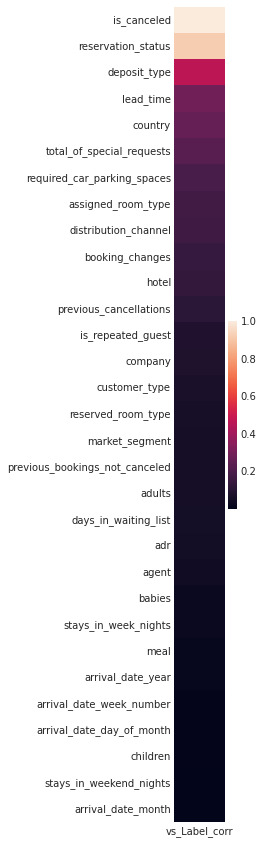

In [ ]:
# corr with target:
train_temp_viz = label_encod_for_corr(train_temp)
label_corr_df = train_temp_viz.corr().abs()["is_canceled"].\
                sort_values(ascending=False).\
                to_frame("vs_Label_corr")
plt.figure(figsize=(1,15)) 
sns.heatmap(label_corr_df)
plt.show()

In [ ]:
inter_cols = ['hotel','arrival_date_year','arrival_date_month','meal',
                   'country','market_segment','distribution_channel',
                   'reserved_room_type','assigned_room_type','deposit_type',
                   'customer_type','reservation_status',
                   'is_canceled','company','agent','is_repeated_guest']

In [ ]:
train_temp_df = train_temp_viz[inter_cols]

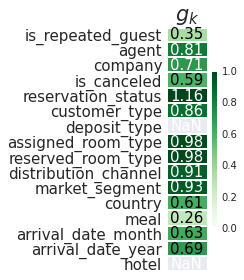

In [ ]:
global_correlation, global_labels = train_temp_df.global_phik(interval_cols=inter_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

## **3.4 - NA fill**

In [ ]:
print("<<-----is_null----->>")
if train.isnull().values.sum() == 0:
    print("no null values in the data")
else:
    for col in train.columns.to_list():
        # Calculate the number of NA values
        is_null_values = train[col].isnull().sum()
        # If the NA values > 0 print the column, number of NA values and the percentage of NA values
        if is_null_values > 0:
            perc_is_null_vals = float(is_null_values)*100/data.shape[0]
            print(f"feature: {col}")
            print(f"null values: {is_null_values}")
            print(f"null value %: {perc_is_null_vals:.3f}%\n")
            print(20*"-","\n")

<<-----is_null----->>
feature: children
null values: 4
null value %: 0.003%

-------------------- 

feature: country
null values: 406
null value %: 0.340%

-------------------- 

feature: agent
null values: 13030
null value %: 10.914%

-------------------- 

feature: company
null values: 90076
null value %: 75.447%

-------------------- 



In [ ]:
# Fill NA val's - TRAIN
imp_na = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
train_no_na = imp_na.fit_transform(train)
train = pd.DataFrame(train_no_na,columns=train.columns, index=train.index).astype(train.dtypes.to_dict()) # astype(DICT) is to revert train to original dtypes
display(train.head(2))
train[train.isna().any(axis=1)]

# Fill NA val's - TEST
imp_na = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
test_temp = imp_na.fit_transform(test)
test = pd.DataFrame(test_temp,columns=test.columns, index=test.index).astype(test.dtypes.to_dict())
display(test.head(2))
test[test.isna().any(axis=1)]                                                                                        # as it changes all to object..

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
57938,City Hotel,0,281,2016,October,41,3,1,3,3,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,7,No Deposit,9.0,0.0,0,Transient-Party,126.3,0,0,Check-Out,2016-10-07
108932,City Hotel,0,102,2017,April,13,1,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,117.0,0,3,Check-Out,2017-04-04


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
50840,City Hotel,0,126,2016,May,20,9,1,5,2,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient-Party,111.35,0,1,Check-Out,2016-05-15
44106,City Hotel,1,27,2015,September,40,30,0,2,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,64.0,0.0,21,Transient,108.00,0,0,Canceled,2015-09-24


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


## **3.5 - SPECIAL RULES**

### parking

In [ ]:
# keep the index as is, and save for concat-predict 
train_data_parking = train[train['required_car_parking_spaces'] > 0]

# cut the rule rows
train_rule_1 = train.drop(train_data_parking.index, axis=0)

# DEBUG
print(f"{train.shape[0]} (trainShape) = {train_data_parking.shape[0]}(ruleShape) + {train_rule_1.shape[0]}(newTrainShape)")
print(True if train.shape[0] == train_data_parking.shape[0] + train_rule_1.shape[0] else False)

### Test

test_data_parking = test[test['required_car_parking_spaces'] > 0]
test_rule_1 = test.drop(test_data_parking.index, axis=0)

# DEBUG
print(f"{test.shape[0]} (testShape) = {test_data_parking.shape[0]}(ruleShape) + {test_rule_1.shape[0]}(newTestShape)")
print(True if test.shape[0] == test_data_parking.shape[0] + test_rule_1.shape[0] else False)

y_test_parking = test_data_parking.is_canceled

y_pred_parking = test_data_parking.required_car_parking_spaces
y_pred_parking = y_pred_parking.replace({1:0, 2:0, 3:0}).astype(int)

print(y_test_parking.shape, y_pred_parking.shape)
display(y_pred_parking.head())
display(y_test_parking.head())

# DEBUG
for i in zip(y_test_parking, y_pred_parking):
    i = list(i)
    if i[0]!=i[1]:
        print("oh no!")

95512 (trainShape) = 5937(ruleShape) + 89575(newTrainShape)
True
23878 (testShape) = 1479(ruleShape) + 22399(newTestShape)
True
(1479,) (1479,)


32633    0
27258    0
18801    0
38536    0
21996    0
Name: required_car_parking_spaces, dtype: int64

32633    0
27258    0
18801    0
38536    0
21996    0
Name: is_canceled, dtype: int64

### deposite

In [ ]:
# keep the index as is, and save for concat-predict 
train_data_deposit = train_rule_1[train_rule_1['deposit_type'] == 'Non Refund']

# cut the rule rows
train_rule_2 = train_rule_1.drop(train_data_deposit.index, axis=0)

# DEBUG
print(f"{train_rule_1.shape[0]} (trainShape) = {train_data_deposit.shape[0]}(ruleShape) + {train_rule_2.shape[0]}(newTrainShape)")
print(True if train_rule_1.shape[0] == train_data_deposit.shape[0] + train_rule_2.shape[0] else False)

### Test

test_data_deposit = test_rule_1[test_rule_1['deposit_type'] == 'Non Refund']
test_rule_2 = test_rule_1.drop(test_data_deposit.index, axis=0)

# DEBUG
print(f"{test_rule_1.shape[0]} (testShape) = {test_data_deposit.shape[0]}(ruleShape) + {test_rule_2.shape[0]}(newTestShape)")
print(True if test_rule_1.shape[0] == test_data_deposit.shape[0] + test_rule_2.shape[0] else False)

y_test_deposit = test_data_deposit.is_canceled
y_pred_deposit = test_data_deposit.deposit_type
y_pred_deposit = y_pred_deposit.replace({'Non Refund':1}).astype(int)

print(y_test_deposit.shape,y_pred_deposit.shape)
display(y_test_deposit.head(7))
display(y_pred_deposit.head(7))

# DEBUG
oh_No_counter = 0
for index, val in enumerate(zip(y_test_deposit, y_pred_deposit)):
    val = list(val)
    if val[0]!=val[1]:
        oh_No_counter+=1
        print(f"oh no!!! index {index} is out of order")

print(f"\nthere are {oh_No_counter} missmatches in this rule")

89575 (trainShape) = 11621(ruleShape) + 77954(newTrainShape)
True
22399 (testShape) = 2965(ruleShape) + 19434(newTestShape)
True
(2965,) (2965,)


44106    1
48163    1
57753    1
52461    1
51757    1
70833    1
4827     0
Name: is_canceled, dtype: int64

44106    1
48163    1
57753    1
52461    1
51757    1
70833    1
4827     1
Name: deposit_type, dtype: int64

oh no!!! index 6 is out of order
oh no!!! index 19 is out of order
oh no!!! index 77 is out of order
oh no!!! index 226 is out of order
oh no!!! index 239 is out of order
oh no!!! index 291 is out of order
oh no!!! index 589 is out of order
oh no!!! index 626 is out of order
oh no!!! index 702 is out of order
oh no!!! index 886 is out of order
oh no!!! index 903 is out of order
oh no!!! index 1091 is out of order
oh no!!! index 1096 is out of order
oh no!!! index 1192 is out of order
oh no!!! index 1288 is out of order
oh no!!! index 1460 is out of order
oh no!!! index 1563 is out of order
oh no!!! index 1651 is out of order
oh no!!! index 1701 is out of order
oh no!!! index 1722 is out of order
oh no!!! index 1808 is out of order
oh no!!! index 1974 is out of order
oh no!!! index 2277 is out of order
oh no!!! index 2479 is out of order
oh no!!! index 2654 is out of order
oh no!!! index 2881 is out of order

there are 26 missmatches in this rule


* **train and test df are ready for transformation (named test\\train_rule_2)**

## **3.6 - spliting the data by `Hotel`**

In [ ]:
# spling the data!
train_resort = train_rule_2[(train_rule_2['hotel']=='Resort Hotel')]
train_city = train_rule_2[(train_rule_2['hotel']=='City Hotel')]

### Test

test_resort = test_rule_2[(test_rule_2['hotel']=='Resort Hotel')]
test_city = test_rule_2[(test_rule_2['hotel']=='City Hotel')]

## **3.7 - Model processing**

In [ ]:
# lists for processing all
drop_columns_all=[]
ohe_columns_all=[]

# lists for processing city
drop_columns_city=[]
ohe_columns_city=[]

# lists for processing resort
drop_columns_resort=[]
ohe_columns_resort=[]


for i in ['reservation_status' ,'reservation_status_date', #'previous_cancellations','previous_cancellations','adults', 'children','babies',
          'required_car_parking_spaces', 'deposit_type','company' ,'agent','country', 'hotel']:
    drop_columns_all.append(i)

print(drop_columns_all)

ohe_columns_city.append('market_segment')
drop_columns_city.append('distribution_channel')
ohe_columns_city.append('customer_type')
drop_columns_city.append('reserved_room_type')
ohe_columns_city.append('assigned_room_type')
ohe_columns_city.append('arrival_date_month') #?
ohe_columns_city.append('arrival_date_year')
drop_columns_city.append('arrival_date_week_number')
drop_columns_city.append('arrival_date_day_of_month')
ohe_columns_city.append('meal')
drop_columns_city.append('lead_time')
drop_columns_city.append('days_in_waiting_list')
ohe_columns_city.append('family_type')
drop_columns_city.extend(drop_columns_all)

ohe_columns_resort.append('market_segment')
drop_columns_resort.append('distribution_channel')
ohe_columns_resort.append('customer_type')
drop_columns_resort.append('reserved_room_type')
ohe_columns_resort.append('assigned_room_type')
ohe_columns_resort.append('arrival_date_month')
ohe_columns_resort.append('arrival_date_year')
drop_columns_resort.append('arrival_date_week_number')
drop_columns_resort.append('arrival_date_day_of_month')
ohe_columns_resort.append('meal')
drop_columns_resort.append('lead_time')
drop_columns_resort.append('days_in_waiting_list')
ohe_columns_resort.append('family_type')
drop_columns_resort.extend(drop_columns_all)

print(len(drop_columns_city),len(drop_columns_resort))

print(len(ohe_columns_city),len(ohe_columns_resort))

['reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'deposit_type', 'company', 'agent', 'country', 'hotel']
14 14
7 7


### **3.7.1 - CITY HOTEL**

#### **City Outliers detection and removal**

In [ ]:
# we descovered only one fearure in city hotel that we want to clean 
train_city.drop(train_city[train_city.market_segment == 'Undefined'].index, axis=0, inplace=True)

### **3.7.2 - RESORT HOTEL**

#### **Resort Outliers detection and removal**

In [ ]:
# remove unreasonable situation (neg or too high ADR)
train_resort = train_resort.loc[(train_resort['adr']>=0)&(train_resort['adr']<1000)]

# **<center>$4 - The Models$ 📈**

## **4.1 - SPLIT (X,y)**

In [ ]:
def trainTestSplit(X, y):
    # Place 20% as testing data.
    X_train, X_test, y_train, y_test = split(X, y, test_size=.2, random_state=seedNum)
    # Debugs: Print out the shape-dimensions and combined row-dimensions of the split DF parts.
    print(f"X_train, X_test dimensions are {X_train.shape}, {X_test.shape}, respectively")
    print(f"X_train, X_test row-dimensions sum-up to {(len(X_train)+len(X_test))},\
    which shouls be the original DF row count ({X.shape[0]})")
    return X_train, X_test, y_train, y_test

In [ ]:
# Split city df into x and Y
X_train_city, y_train_city = train_city.loc[:, train_city.columns != target_col], train_city.loc[:, target_col]
X_test_city, y_test_city = test_city.loc[:, test_city.columns != target_col], test_city.loc[:, target_col]

# Split resort df into x and Y
X_train_resort, y_train_resort = train_resort.loc[:, train_resort.columns != target_col], train_resort.loc[:, target_col]
X_test_resort, y_test_resort = test_resort.loc[:, test_resort.columns != target_col], test_resort.loc[:, target_col]

# cp
X_train_resort_v1 = X_train_resort.copy()
X_test_resort_v1 = X_test_resort.copy()
X_train_city_v1 = X_train_city.copy()
X_test_city_v1 = X_test_city.copy()
y_train_resort_v1 = y_train_resort.copy()
y_test_resort_v1 = y_test_resort.copy()
y_train_city_v1 = y_train_city.copy()
y_test_city_v1 = y_test_city.copy()

In [ ]:
print(f"drop_columns_city: {drop_columns_city}\ndrop_columns_resort: {drop_columns_resort}")

drop_columns_city: ['distribution_channel', 'reserved_room_type', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'days_in_waiting_list', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'deposit_type', 'company', 'agent', 'country', 'hotel']
drop_columns_resort: ['distribution_channel', 'reserved_room_type', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'days_in_waiting_list', 'reservation_status', 'reservation_status_date', 'required_car_parking_spaces', 'deposit_type', 'company', 'agent', 'country', 'hotel']
time: 1.49 ms (started: 2022-01-31 11:35:51 +00:00)


### FIX

In [ ]:
print(len(drop_columns_city), len(drop_columns_resort))

transformer_fix_city = MyFeatureFixer(drop_cols=drop_columns_city) # fix_columns_city
transformer_fix_resort = MyFeatureFixer(drop_cols=drop_columns_resort) # fix_columns_city

print(len(drop_columns_city), len(drop_columns_resort))

transformer_fit_city = transformer_fix_city.fit(X_train_city_v1)
transformer_fit_resort = transformer_fix_resort.fit(X_train_resort_v1)

print(len(drop_columns_city), len(drop_columns_resort))

14 14
14 14
14 14


In [ ]:
# X_train_city_T = pd.DataFrame(transformer_fit_city.transform(X_train_city_v1, y_train_city_v1), 
#                                  columns=X_train_city_v1.columns, index=X_train_city_v1.index)

X_train_city_T = transformer_fit_city.transform(X_train_city_v1)
print(len(drop_columns_city), len(drop_columns_resort))
X_train_resort_T = transformer_fit_resort.transform(X_train_resort_v1)
print(len(drop_columns_city), len(drop_columns_resort))

['reservation_status_date', 'hotel', 'country', 'agent', 'deposit_type', 'required_car_parking_spaces', 'reserved_room_type', 'distribution_channel', 'reservation_status', 'days_in_waiting_list', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'company', 'previous_cancellations', 'previous_bookings_not_canceled', 'adults', 'children', 'babies']
14 14
['reservation_status_date', 'hotel', 'country', 'agent', 'deposit_type', 'required_car_parking_spaces', 'reserved_room_type', 'distribution_channel', 'reservation_status', 'days_in_waiting_list', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'company', 'previous_cancellations', 'previous_bookings_not_canceled', 'adults', 'children', 'babies']
14 14


### test Fix T

In [ ]:
X_test_city_T = transformer_fit_city.transform(X_test_city_v1)
X_test_resort_T = transformer_fit_resort.transform(X_test_resort_v1)

print(X_train_city_T.shape)

print(X_test_city_T.shape)

print(X_train_resort_T.shape)

print(X_test_resort_T.shape)

['reservation_status_date', 'hotel', 'country', 'agent', 'deposit_type', 'required_car_parking_spaces', 'reserved_room_type', 'distribution_channel', 'reservation_status', 'days_in_waiting_list', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'company', 'previous_cancellations', 'previous_bookings_not_canceled', 'adults', 'children', 'babies']
['reservation_status_date', 'hotel', 'country', 'agent', 'deposit_type', 'required_car_parking_spaces', 'reserved_room_type', 'distribution_channel', 'reservation_status', 'days_in_waiting_list', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'company', 'previous_cancellations', 'previous_bookings_not_canceled', 'adults', 'children', 'babies']
(51666, 15)
(12868, 15)
(26285, 15)
(6566, 15)


### OHE

In [ ]:
X_train_city_pre_ohe = X_train_city_T.copy()
X_test_city_pre_ohe = X_test_city_T.copy()
X_train_resort_pre_ohe = X_train_resort_T.copy()
X_test_resort_pre_ohe = X_test_resort_T.copy()

In [ ]:
phik_overview = X_train_city_pre_ohe.phik_matrix()
phik_overview.round(2).head(2)

interval columns not set, guessing: ['stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest', 'booking_changes', 'adr', 'total_of_special_requests', 'previously_canceled', 'previously_arrived']


,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,meal,market_segment,is_repeated_guest,assigned_room_type,booking_changes,customer_type,adr,total_of_special_requests,previously_canceled,previously_arrived,family_type
arrival_date_year,1.0,0.7,0.05,0.06,0.14,0.35,0.03,0.17,0.05,0.33,0.30,0.28,0.17,0.01,0.14
arrival_date_month,0.7,1.0,0.09,0.10,0.21,0.19,0.08,0.07,0.04,0.28,0.29,0.10,0.17,0.08,0.18


interval columns not set, guessing: ['is_canceled', 'is_repeated_guest']
interval columns not set, guessing: ['is_canceled', 'is_repeated_guest']


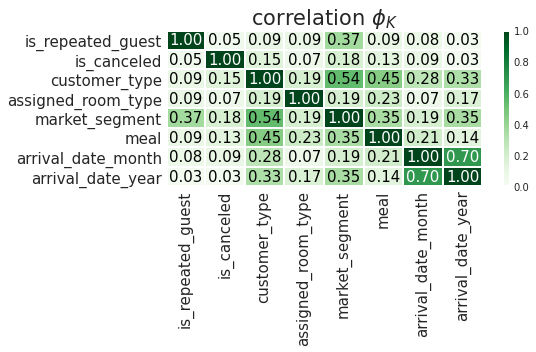

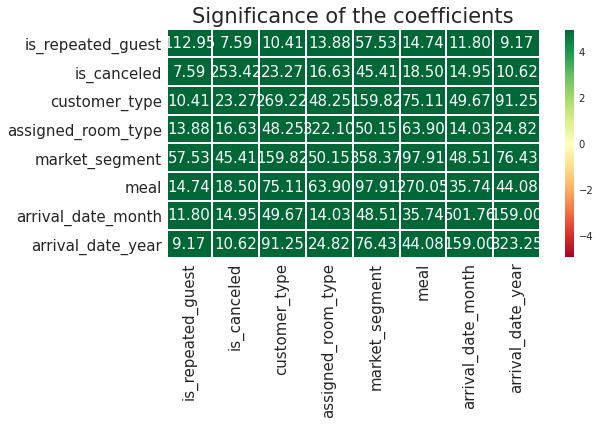

In [ ]:
phik_plotter(X_train_city_pre_ohe.join(y_train_city_v1), inter_cols)

interval columns not set, guessing: ['is_canceled', 'is_repeated_guest']
interval columns not set, guessing: ['is_canceled', 'is_repeated_guest']


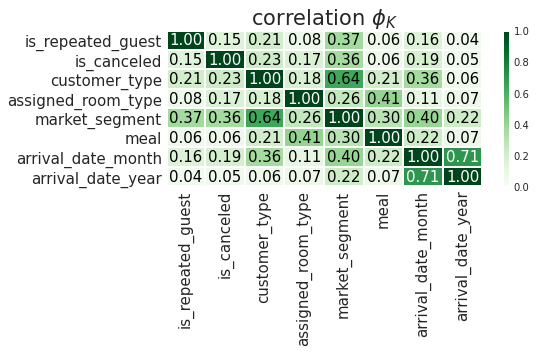

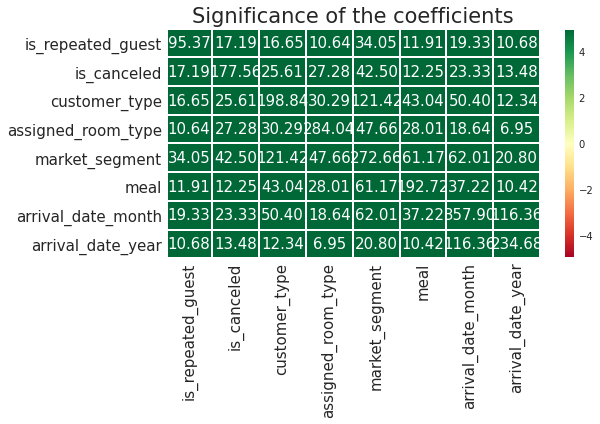

In [ ]:
phik_plotter(X_train_city_pre_ohe.join(y_train_resort_v1), inter_cols)

**Init**

In [ ]:
print(len(ohe_columns_city), len(ohe_columns_resort))

transformer_ohe_city = MyFeatureEncoder(ohe_cols=ohe_columns_city) # fix_columns_city
transformer_ohe_resort = MyFeatureEncoder(ohe_cols=ohe_columns_resort) # fix_columns_resort

print(len(ohe_columns_city), len(ohe_columns_resort))

7 7
7 7


**Fit**

In [ ]:
transformer_ohe_fit_city = transformer_ohe_city.fit(X_train_city_pre_ohe)
transformer_ohe_fit_resort = transformer_ohe_resort.fit(X_train_resort_pre_ohe)

defaultdict(None, {'arrival_date_year': [['arrival_date_year_2016', 'arrival_date_year_2017', 'arrival_date_year_2015'], [2016, 2017, 2015]], 'customer_type': [['customer_type_Transient-Party', 'customer_type_Transient', 'customer_type_Contract', 'customer_type_Group'], ['Transient-Party', 'Transient', 'Contract', 'Group']], 'arrival_date_month': [['arrival_date_month_October', 'arrival_date_month_April', 'arrival_date_month_June', 'arrival_date_month_July', 'arrival_date_month_March', 'arrival_date_month_February', 'arrival_date_month_August', 'arrival_date_month_September', 'arrival_date_month_May', 'arrival_date_month_January', 'arrival_date_month_December', 'arrival_date_month_November'], ['October', 'April', 'June', 'July', 'March', 'February', 'August', 'September', 'May', 'January', 'December', 'November']], 'family_type': [['family_type_adults_only_small', 'family_type_adults_only_couples', 'family_type_adults_only_singles', 'family_type_family_wo_babies', 'family_type_families

In [ ]:
print(len(ohe_columns_city), len(ohe_columns_resort))

7 7


**Transform**

In [ ]:
X_train_city_post_ohe = transformer_ohe_fit_city.transform(X_train_city_pre_ohe)
print(len(ohe_columns_city), len(ohe_columns_resort))

X_test_city_post_ohe = transformer_ohe_fit_city.transform(X_test_city_pre_ohe)
print(len(ohe_columns_city), len(ohe_columns_resort))

start of feature $arrival_date_year$ encoding, X_shape is: $(51666, 15)$
feature $arrival_date_year$ encoded (not added yet), the shape of i df is: $(51666, 3)$
end of feature $arrival_date_year$ encoding, X_shape is: $(51666, 17)$ (should be the start shape + (feature shape - 1))
start of feature $customer_type$ encoding, X_shape is: $(51666, 17)$
feature $customer_type$ encoded (not added yet), the shape of i df is: $(51666, 4)$
end of feature $customer_type$ encoding, X_shape is: $(51666, 20)$ (should be the start shape + (feature shape - 1))
start of feature $arrival_date_month$ encoding, X_shape is: $(51666, 20)$
feature $arrival_date_month$ encoded (not added yet), the shape of i df is: $(51666, 12)$
end of feature $arrival_date_month$ encoding, X_shape is: $(51666, 31)$ (should be the start shape + (feature shape - 1))
start of feature $family_type$ encoding, X_shape is: $(51666, 31)$
feature $family_type$ encoded (not added yet), the shape of i df is: $(51666, 7)$
end of featur

In [ ]:
X_train_resort_post_ohe = transformer_ohe_fit_resort.transform(X_train_resort_pre_ohe)
print(len(ohe_columns_city), len(ohe_columns_resort))

X_test_resort_post_ohe = transformer_ohe_fit_resort.transform(X_test_resort_pre_ohe)
print(len(ohe_columns_city), len(ohe_columns_resort))

start of feature $arrival_date_year$ encoding, X_shape is: $(26285, 15)$
feature $arrival_date_year$ encoded (not added yet), the shape of i df is: $(26285, 3)$
end of feature $arrival_date_year$ encoding, X_shape is: $(26285, 17)$ (should be the start shape + (feature shape - 1))
start of feature $customer_type$ encoding, X_shape is: $(26285, 17)$
feature $customer_type$ encoded (not added yet), the shape of i df is: $(26285, 4)$
end of feature $customer_type$ encoding, X_shape is: $(26285, 20)$ (should be the start shape + (feature shape - 1))
start of feature $arrival_date_month$ encoding, X_shape is: $(26285, 20)$
feature $arrival_date_month$ encoded (not added yet), the shape of i df is: $(26285, 12)$
end of feature $arrival_date_month$ encoding, X_shape is: $(26285, 31)$ (should be the start shape + (feature shape - 1))
start of feature $family_type$ encoding, X_shape is: $(26285, 31)$
feature $family_type$ encoded (not added yet), the shape of i df is: $(26285, 7)$
end of featur

## **4.2 - First Model: DecisionTree+GridParams**

In [ ]:
X_train_city_v2 = X_train_city_post_ohe.copy()
X_test_city_v2 = X_test_city_post_ohe.copy()
X_train_resort_v2 = X_train_resort_post_ohe.copy()
X_test_resort_v2 = X_test_resort_post_ohe.copy()

y_train_resort_v2 = y_train_resort_v1.copy()
y_test_resort_v2 = y_test_resort_v1.copy()
y_train_city_v2 = y_train_city_v1.copy()
y_test_city_v2 = y_test_city_v1.copy()

In [ ]:
any((X_train_city_v2.isna().sum() != 0)| (X_test_city_v2.isna().sum() != 0)| (X_train_resort_v2.isna().sum() != 0)| (X_test_resort_v2.isna().sum() != 0))

False

In [ ]:
def feature_imp_rf(model, x_train):
    print(f'Per Fitting Feature Importances:')
    importances = model.feature_importances_
    feature_names = model.feature_names_in_
    rf_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
    plt.figure(figsize=(20,28))
    sns.barplot(x=rf_importances, y=rf_importances.index, palette="Spectral");
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show();

def model_feature_importance(model, X, XGB=False):
    if XGB:
        print(f'Per Fitting Feature Importances (xgb):')
        explainer = shap.Explainer(model)
        shap_values = explainer(X)
        cohorts = {"": shap_values}
        cohort_labels = list(cohorts.keys())
        cohort_exps = list(cohorts.values())
        for i in range(len(cohort_exps)):
            if len(cohort_exps[i].shape) == 2:
                cohort_exps[i] = cohort_exps[i].abs.mean(0)
        features = cohort_exps[0].data
        feature_names = cohort_exps[0].feature_names
        values = np.array([cohort_exps[i].values for i in range(len(cohort_exps))])
        # wrap val's and feature names in DF
        shap_importance_df = pd.DataFrame(
            list(zip(feature_names, sum(values))), columns=['features', 'importance'])
        shap_importance_df.sort_values(
            by=['importance'], ascending=False, inplace=True)
        # display shap_importance data
        print(f'\ndata Shap_df with {shap_importance_df.shape[0]} rows and {shap_importance_df.shape[1]} columns') 
        display(data_table.DataTable(shap_importance_df.head(20), include_index=True, num_rows_per_page=20, 
                                max_rows=None, max_columns=df.shape[1], min_width=None))
        # plot
        plt.figure() #figsize=(25,60)
        plt.subplot(311)
        shap.summary_plot(shap_values, X, plot_type="bar",plot_size=1.2)
        plt.tight_layout()
        plt.subplot(312)
        shap.summary_plot(shap_values, X,plot_size=1.2)
        plt.tight_layout()
        plt.show();
        shap.plots.bar(shap_values, max_display=20)
        plt.tight_layout()
        plt.show();
    
    else:
        print(f'Per Fitting Feature Importances (rf):')
        shap_values_1 = shap.TreeExplainer(model).shap_values(X)
        importances = model.feature_importances_
        feature_names = model.feature_names_in_
        rf_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:20]
        # plot
        plt.figure(figsize=(20,28))
        plt.subplot(211)
        sns.barplot(x=rf_importances, y=rf_importances.index, palette="Spectral");
        plt.xticks(rotation=90)
        plt.subplot(212)
        shap.summary_plot(shap_values_1, plot_type="bar")
        plt.tight_layout()
        plt.show();

In [ ]:
X_train_city_A = X_train_city_v2.copy()
X_test_city_A = X_test_city_v2.copy()
X_train_resort_A = X_train_resort_v2.copy()
X_test_resort_A = X_test_resort_v2.copy()

y_train_resort_A = y_train_resort_v2.copy()
y_test_resort_A = y_test_resort_v2.copy()
y_train_city_A = y_train_city_v2.copy()
y_test_city_A = y_test_city_v2.copy()

In [ ]:
# XGB = False

init_model_city_A_ = RandomForestClassifier()
init_model_resort_A_ = RandomForestClassifier()

init_param_grid_rf_init = {'max_depth': [10],
                      "n_estimators": [50],}

param_grid_A = init_param_grid_rf_init.copy()

In [ ]:
XGB = False

init_model_city_A_ = RandomForestClassifier()
init_model_resort_A_ = RandomForestClassifier()

init_param_grid_rf = {'max_depth': [13,15,16],
                        "n_estimators": [500],
                        'min_impurity_decrease': [1e-4, 1e-7],
                        'min_weight_fraction_leaf': [0.0001, 0.005],
                        'ccp_alpha': [0.00, 0.035],
                        'class_weight': ['balanced']}

param_grid_A = init_param_grid_rf.copy()

In [ ]:
my_k = 5 # => 80% validation

my_cv_A = KFold(n_splits=my_k, shuffle=True, random_state=seedNum)
model_rs_city_A = GridSearchCV(init_model_city_A_, 
                            param_grid_A, 
                            scoring='roc_auc', 
                            # n_iter=10, 
                            # random_state=seedNum, 
                            # n_jobs=-1,
                            cv=my_cv_A)

model_rs_resort_A = GridSearchCV(init_model_resort_A_, 
                            param_grid_A, 
                            scoring='roc_auc', 
                            # n_iter=10, 
                            # random_state=seedNum, 
                            # n_jobs=-1,
                            cv=my_cv_A)

### **4.2.1 - Decision-Tree model initiation, training & validation**

The most utilized hyper-parameters are:

* `max_depth`
* `min_samples_leaf`
* `max_leaf_nodes`
* `min_weight_fraction_leaf`

#### **🏨 CITY MODEL**

In [ ]:
init_model_city_A = init_model_city_A_.fit(X_train_city_A, y_train_city_A)

In [ ]:
feature_imp_rf(init_model_city_A, X_train_city_A)

In [ ]:
# no shap for rf ?? something wrong here..
model_feature_importance(init_model_city_A, X_train_city_A)

Per Fitting Feature Importances (rf):


In [ ]:
model_city_A = model_rs_city_A.fit(X_train_city_A, y_train_city_A)
best_rs_param_city_A = model_city_A.best_params_
best_rs_predictor_city_A = model_city_A.best_estimator_
rs_cv_city_A = cross_val_score(best_rs_predictor_city_A, X_train_city_A, y_train_city_A, 
                            cv=my_cv_A, scoring='roc_auc')
print(f'~~~~~City Model~~~~~~\n')
print(f'Clf Best Params:  {best_rs_param_city_A}')
print(f'Clf Best predictor:  {best_rs_predictor_city_A}')
print(f'CV Score (k={5})  Min: {rs_cv_city_A.min():8.5f}, Mean: {rs_cv_city_A.mean():8.5f}, Max: {rs_cv_city_A.max():8.5f}')

~~~~~City Model~~~~~~

Clf Best Params:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'max_depth': 16, 'min_impurity_decrease': 1e-07, 'min_weight_fraction_leaf': 0.0001, 'n_estimators': 500}
Clf Best predictor:  RandomForestClassifier(class_weight='balanced', max_depth=16,
                       min_impurity_decrease=1e-07,
                       min_weight_fraction_leaf=0.0001, n_estimators=500)
CV Score (k=5)  Min:  0.83533, Mean:  0.84287, Max:  0.84530


#### **🏞 RESORT HOTEL**

In [ ]:
init_model_resort_A = init_model_resort_A_.fit(X_train_resort_A, y_train_resort_A)

In [ ]:
feature_imp_rf(init_model_resort_A, X_train_resort_A)

In [ ]:
init_model_resort_A = init_model_resort_A_.fit(X_train_resort_A, y_train_resort_A)
model_resort_A = model_rs_resort_A.fit(X_train_resort_A, y_train_resort_A)
best_rs_param_resort_A = model_resort_A.best_params_
best_rs_predictor_resort_A = model_resort_A.best_estimator_
rs_cv_resort_A = cross_val_score(model_resort_A, X_train_resort_A, y_train_resort_A, 
                            cv=my_cv_A, scoring='roc_auc')
print(f'~~~~~Resort Model~~~~~~\n')
print(f'Clf Best Params:  {best_rs_param_resort_A}')
print(f'Clf Best predictor:  {best_rs_predictor_resort_A}')
print(f'CV Score (k={5})  Min: {rs_cv_resort_A.min():8.5f}, Mean: {rs_cv_resort_A.mean():8.5f}, Max: {rs_cv_resort_A.max():8.5f}')

~~~~~Resort Model~~~~~~

Clf Best Params:  {'class_weight': 'balanced', 'max_depth': 15, 'min_impurity_decrease': 0.0001, 'min_weight_fraction_leaf': 0.001}
Clf Best predictor:  DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_impurity_decrease=0.0001,
                       min_weight_fraction_leaf=0.001)
CV Score (k=5)  Min:  0.79525, Mean:  0.79999, Max:  0.80776


### **4.2.2 - Decision-Tree model UNION & SCORIN**

In [ ]:
# # predict
y_prob_city_A = model_city_A.predict_proba(X_test_city_A)[:,1]
y_pred_city_A = model_city_A.predict(X_test_city_A)
y_prob_city_A = pd.Series(y_prob_city_A, index=X_test_city_A.index)
y_pred_city_A = pd.Series(y_pred_city_A, index=X_test_city_A.index)
y_prob_resort_A = model_resort_A.predict_proba(X_test_resort_A)[:,1]
y_pred_resort_A = model_resort_A.predict(X_test_resort_A)
y_prob_resort_A = pd.Series(y_prob_resort_A, index=X_test_resort_A.index)
y_pred_resort_A = pd.Series(y_pred_resort_A, index=X_test_resort_A.index)
y_test_A = pd.concat([y_test_parking, y_test_deposit, 
                    y_test_city_A, y_test_resort_A], 
                    verify_integrity=True)
y_pred_A = pd.concat([y_pred_parking, y_pred_deposit, 
                    y_pred_city_A, y_pred_resort_A], 
                    verify_integrity=True)
y_prob_A = pd.concat([y_pred_parking, y_pred_deposit, 
                    y_prob_city_A, y_prob_resort_A], 
                    verify_integrity=True)

# score
print(f'~~~~~~Score~~~~~\n')
auc_score_A = roc_auc_score(y_test_A, y_prob_A)
clf_rep_A = classification_report(y_test_A, y_pred_A)
con_mat_A = pd.DataFrame(confusion_matrix(y_test_A, y_pred_A))
print(f'AUC: {auc_score_A:.3f}\n\nConfusion Matrix:\n {con_mat_A}\n\n{clf_rep_A}')

~~~~~~Score~~~~~

AUC: 0.887

Confusion Matrix:
        0     1
0  11539  3452
1   1608  7279

              precision    recall  f1-score   support

           0       0.88      0.77      0.82     14991
           1       0.68      0.82      0.74      8887

    accuracy                           0.79     23878
   macro avg       0.78      0.79      0.78     23878
weighted avg       0.80      0.79      0.79     23878



### **4.2.3 - Decision-Tree model Matrix & ROC curve**

~~~~~~Ploting~~~~~



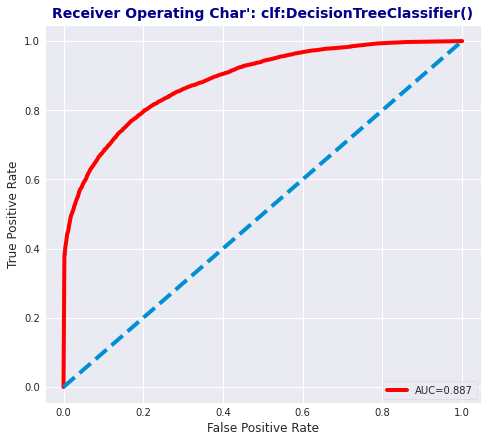

In [ ]:
# plot
print(f'~~~~~~Ploting~~~~~\n')
false_positive_rate_A, true_positive_rate_A, threshold_A = roc_curve(y_test_A, y_prob_A)
roc_auc_A = auc(false_positive_rate_A, true_positive_rate_A)

fig=plt.figure(figsize = (7,7))
plt.title(f'Receiver Operating Char\': clf:{init_model_resort_A_}', 
            color=colors_1[11], fontweight="bold", fontdict={'fontsize': 14})
plt.plot(false_positive_rate_A, true_positive_rate_A, color='red', 
            label = f'AUC={auc_score_A:.3f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### predictions

In [ ]:
# Random Forest
# Grid
init_param_grid_rf = {'max_depth': [13,15,16],
                        "n_estimators": [500],
                        'min_impurity_decrease': loguniform(1e-4, 1e-7),
                        'min_weight_fraction_leaf': loguniform(0.0001, 0.005),
                        'ccp_alpha': loguniform(0.00, 0.035),
                        'class_weight': ['balanced'],
                        'warm_start': [True]
                        'C': loguniform(1e0, 1e3),
                        'gamma': loguniform(1e-4, 1e-3),
                        'kernel': ['rbf']}
print("@@@@@@@@@@@@@<<RF>>@@@@@@@@@@@@@@")
print('Model: Random Forest\n')
# Modeling
my_model(RandomForestClassifier(), X_train_city_v2, X_test_city_v2,
         y_train_city_v2, y_test_city_v2, X_train_resort_v2,
         X_test_resort_v2, y_train_resort_v2, y_test_resort_v2,, **init_param_grid_rf)

@@@@@@@@@@@@@<<RF>>@@@@@@@@@@@@@@
Model: Random Forest

~~~~~City Model~~~~~~

Clf Best Params:  {'min_weight_fraction_leaf': 0.001, 'min_impurity_decrease': 1e-07, 'max_depth': 15, 'class_weight': 'balanced'}
Clf Best predictor:  RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_weight_fraction_leaf=0.0001, n_estimators=500,
                       warm_start=True)
CV Score (k=5)  Min:  0.83728, Mean:  0.84068, Max:  0.84773
Per Fitting Feature Importances:
Feature importances not available
~~~~~Resort Model~~~~~~

Clf Best Params:  {'min_weight_fraction_leaf': 0.001, 'min_impurity_decrease': 1e-07, 'max_depth': 15, 'class_weight': 'balanced'}
Clf Best predictor:  RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_weight_fraction_leaf=0.0001, n_estimators=500,
                       warm_start=True)
CV Score (k=5)  Min:  0.83602, Mean:  0.83928, Max:  0.84067
Per Fitting Feature Importances:
Feature importance

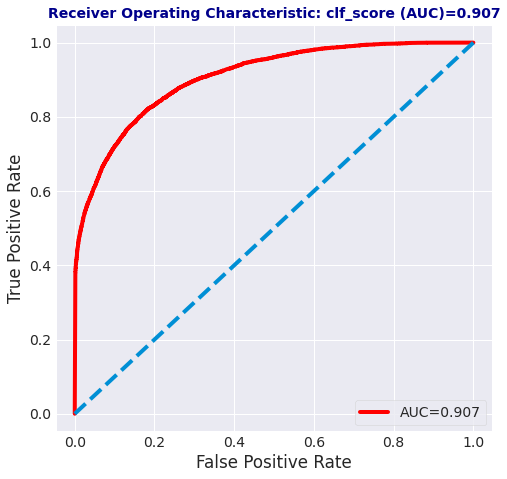

@@@@@@@@@@@@@@@@@@@@@@@@@@@
It took 4851.28 seconds


In [ ]:
# Random Forest
# Grid
init_param_grid_rf = {'max_depth': [13,15,16],
                        "n_estimators": [500],
                        'min_impurity_decrease': loguniform(1e-4, 1e-7),
                        'min_weight_fraction_leaf': loguniform(0.0001, 0.005),
                        'ccp_alpha': loguniform(0.00, 0.035),
                        'class_weight': ['balanced'],
                        'warm_start': [True]
                        'C': loguniform(1e0, 1e3),
                        'gamma': loguniform(1e-4, 1e-3),
                        'kernel': ['rbf']}
print("@@@@@@@@@@@@@<<RF>>@@@@@@@@@@@@@@")
print('Model: Random Forest\n')
# Modeling
my_model(RandomForestClassifier(), X_train_city_v2, X_test_city_v2,
         y_train_city_v2, y_test_city_v2, X_train_resort_v2,
         X_test_resort_v2, y_train_resort_v2, y_test_resort_v2, **init_param_grid_rf)

In [ ]:
# XGBoost
# Grid
print('Model: XGBoost\n')
init_param_grid_xgb = {'colsample_bytree': loguniform(0.3, 0.5), 'n_estimators': [300],
                       'learning_rate': loguniform(0.1,0.4), 'max_depth': [6], 'alpha': loguniform(10,12), 
                       'scale_pos_weight': [1], 'min_child_weight': [6]}
# XGBClassifier(
#  learning_rate =0.01,
#  n_estimators=5000,
#  max_depth=4,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  reg_alpha=0.005,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
print("@@@@@@@@@@@@@<<XGBoost>>@@@@@@@@@@@@@@")
my_model(XGBClassifier(objective ='binary:logistic', eval_metric = 'auc'), 
         X_train_city_v2, X_test_city_v2, y_train_city_v2, y_test_city_v2, X_train_resort_v2,
         X_test_resort_v2, y_train_resort_v2, y_test_resort_v2, **init_param_grid_xgb)

Model: XGBoost

@@@@@@@@@@@@@<<XGBoost>>@@@@@@@@@@@@@@
~~~~~City Model~~~~~~

Clf Best Params:  {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.3, 'alpha': 10}
Clf Best predictor:  XGBClassifier(alpha=10, colsample_bytree=0.3, eval_metric='auc',
              learning_rate=0.3, max_depth=6, n_estimators=200)
CV Score (k=5)  Min:  0.82918, Mean:  0.83278, Max:  0.83942
Per Fitting Feature Importances:
Feature importances not available
~~~~~Resort Model~~~~~~

Clf Best Params:  {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.3, 'alpha': 10}
Clf Best predictor:  XGBClassifier(alpha=10, colsample_bytree=0.3, eval_metric='auc',
              learning_rate=0.3, max_depth=6, n_estimators=200)
CV Score (k=5)  Min:  0.82629, Mean:  0.82913, Max:  0.83154
Per Fitting Feature Importances:
Feature importances not available
~~~~~~Score~~~~~

AUC: 0.902

Confusion Matrix:
        0     1
0  13669  1238
1   2782  6189

              

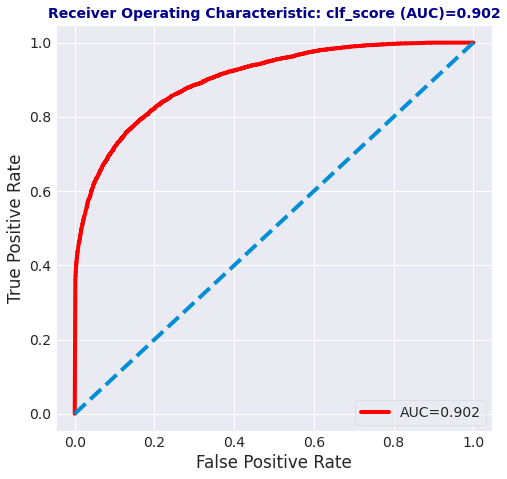

@@@@@@@@@@@@@@@@@@@@@@@@@@@
It took 2273.95 seconds


In [ ]:
# XGBoost
# Grid
print('Model: XGBoost\n')
init_param_grid_xgb = {'colsample_bytree': loguniform(0.3, 0.5), 'n_estimators': [300],
                       'learning_rate': loguniform(0.1,0.4), 'max_depth': [6], 'alpha': loguniform(10,12), 
                       'scale_pos_weight': [1], 'min_child_weight': [6]}
# XGBClassifier(
#  learning_rate =0.01,
#  n_estimators=5000,
#  max_depth=4,
#  min_child_weight=6,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  reg_alpha=0.005,
#  objective= 'binary:logistic',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)
print("@@@@@@@@@@@@@<<XGBoost>>@@@@@@@@@@@@@@")
my_model(XGBClassifier(objective ='binary:logistic', eval_metric = 'auc'), X_train_city, X_test_city, 
         y_train_city, y_test_city, X_train_resort, 
         X_test_resort, y_train_resort, y_test_resort, **init_param_grid_xgb)